# Day 2:
- Implement a Basic CNN from Scratch (on CIFAR-10)
- Inspect other Advanced Architectures (Inception, VGG, EfficientNet, MobileNet, etc.)
# Implementation of a Basic CNN from Scratch on CIFAR-10 Dataset

In [ ]:
import warnings
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [ ]:
# import os
# from google.colab import drive

# # Mounting MyDrive to this notebook to be able to load images
# drive.mount('/content/drive')
# os.listdir('/content/drive/MyDrive')

In [ ]:
# Loading CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


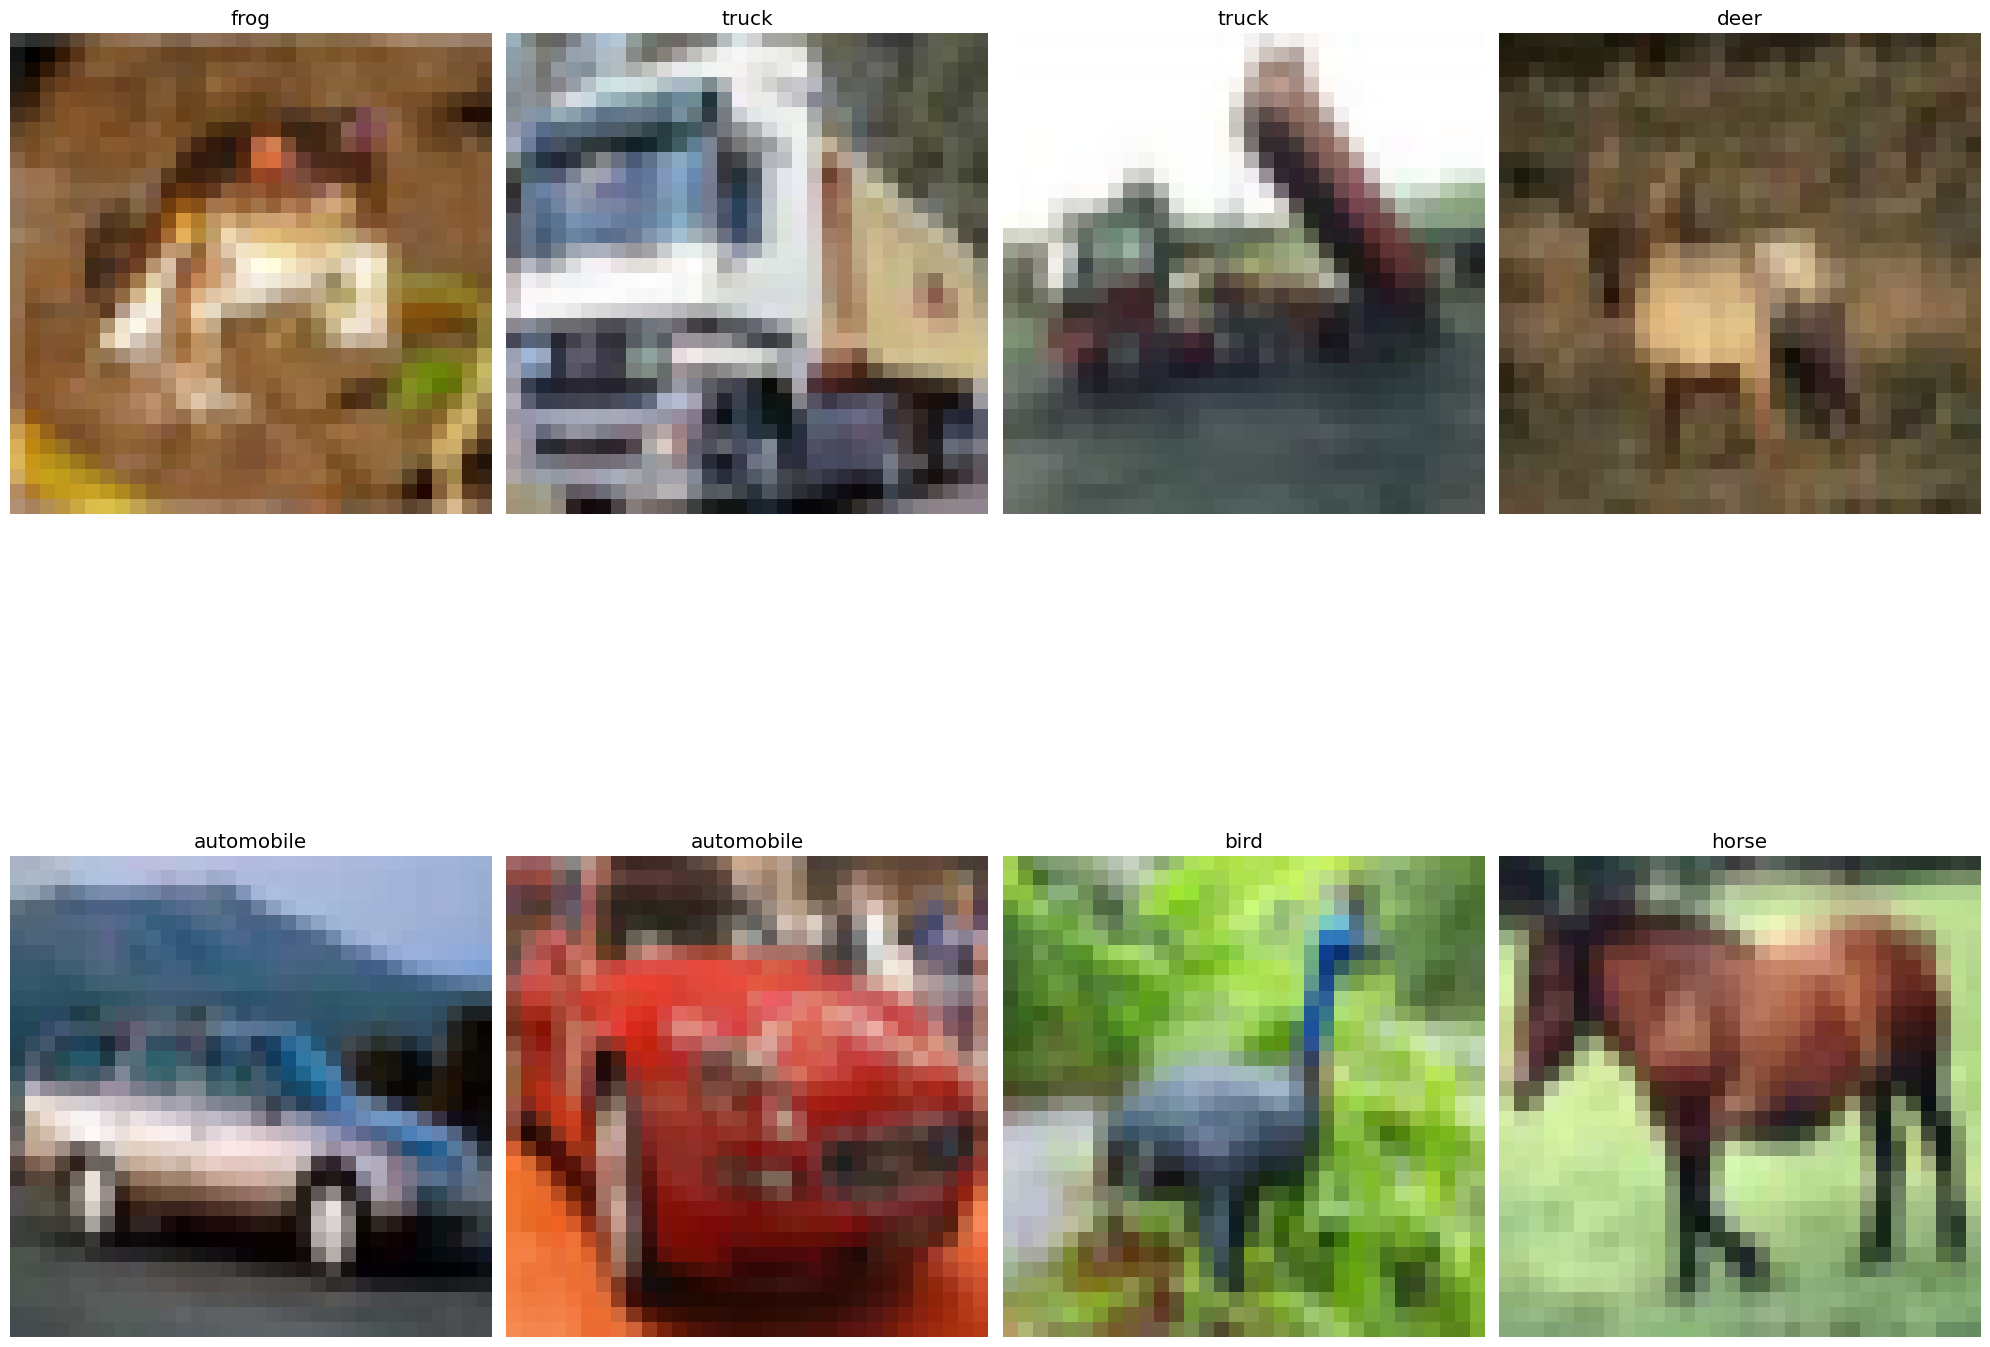

In [ ]:
# Let's plot some images

def plotImages(images_arr, images_labels):
    fig, axes = plt.subplots(2, 4, figsize=(20,20))
    axes = axes.flatten()  # you can comment this if you have only 1 row
    i = 0
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.set_title(labels[images_labels[i, 0]])
        ax.axis('off')
        i += 1
    plt.tight_layout()
    plt.show()

plotImages(x_train[:8], y_train[:8])

In [ ]:
# CNN creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train.shape[1:]),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Model compilation
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Data preparation
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Model training
BATCH_SIZE = 32
EPOCHS = 30

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5696 - loss: 1.2073 - val_accuracy: 0.6221 - val_loss: 1.0677
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5986 - loss: 1.1192 - val_accuracy: 0.5966 - val_loss: 1.1382
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6193 - loss: 1.0686 - val_accuracy: 0.6700 - val_loss: 0.9446
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6404 - loss: 1.0073 - val_accuracy: 0.6658 - val_loss: 0.9553
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6596 - loss: 0.9602 - val_accuracy: 0.6858 - val_loss: 0.8978
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6662 - loss: 0.9414 - val_accuracy: 0.6951 - val_loss: 0.8860
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6786 - loss: 0.9028 - val_accuracy: 0.6993 - val_loss: 0.8568
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6865 - loss: 0.8789 - 

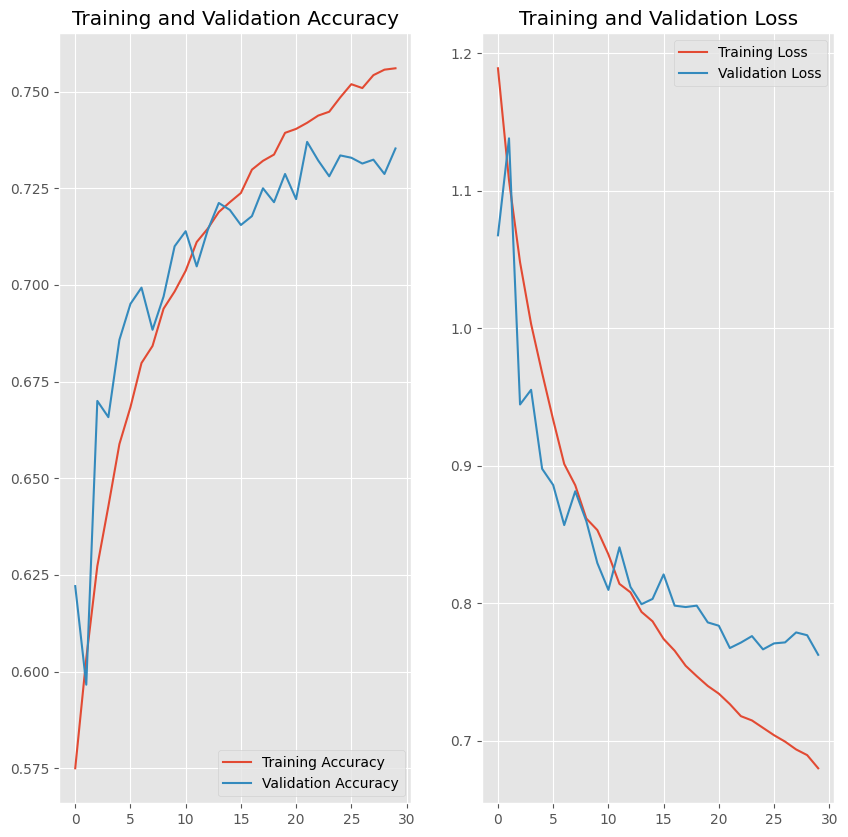

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## Let's fine-tune our model a little bit

In [ ]:
# Data preparation
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Model's layers "assembling"
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train.shape[1:]),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Model compilation
model1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Training the model
BATCH_SIZE = 32
EPOCHS = 30

history = model1.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2808 - loss: 1.9069 - val_accuracy: 0.4739 - val_loss: 1.4419
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.4601 - loss: 1.4707 - val_accuracy: 0.5424 - val_loss: 1.2886
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5142 - loss: 1.3397 - val_accuracy: 0.5746 - val_loss: 1.1921
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5439 - loss: 1.2660 - val_accuracy: 0.5991 - val_loss: 1.1214
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5723 - loss: 1.2043 - val_accuracy: 0.6187 - val_loss: 1.0725
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5856 - loss: 1.1579 - val_accuracy: 0.6199 - val_loss: 1.0665
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6000 - loss: 1.1260 - val_accuracy: 0.6274 - val_loss: 1.0498
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6130 - loss: 1.0905 

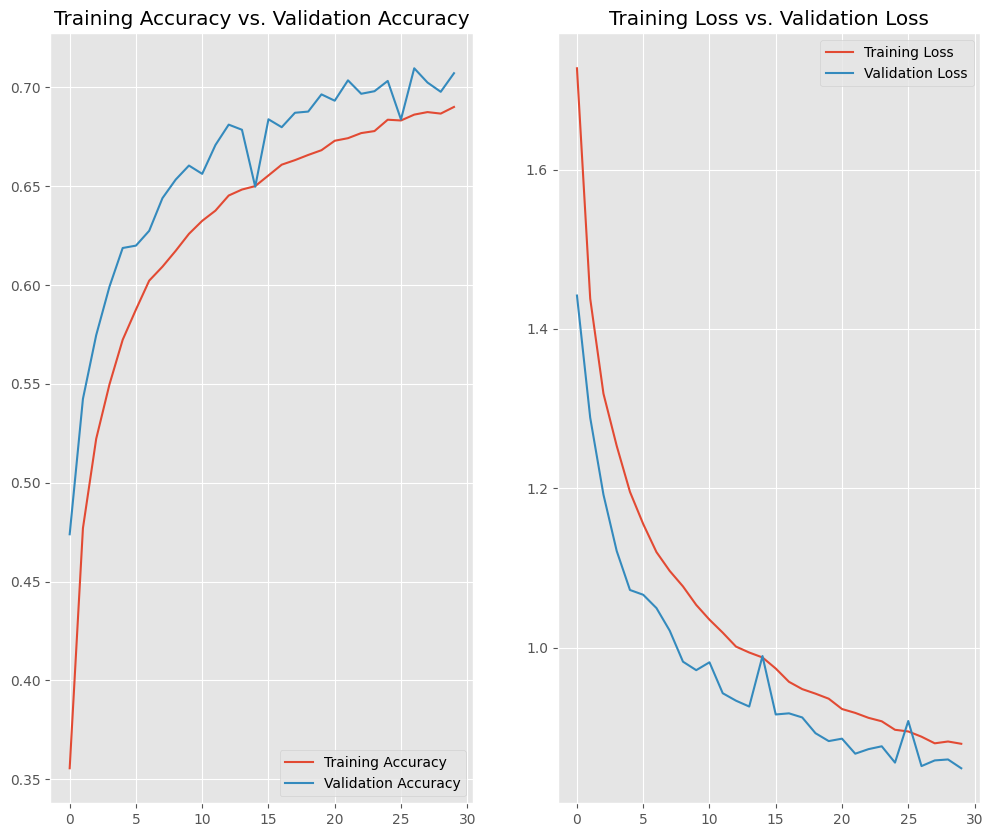

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss vs. Validation Loss')

plt.show()

In [ ]:
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 5, 5, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,048 (476.75 KB)

 Trainable params: 40,682 (158.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,366 (317.84 KB)

In [ ]:
y_preds = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_preds = np.argmax(y_preds, axis=1)

In [ ]:
y_preds = np.reshape(y_preds, (10000, 1))

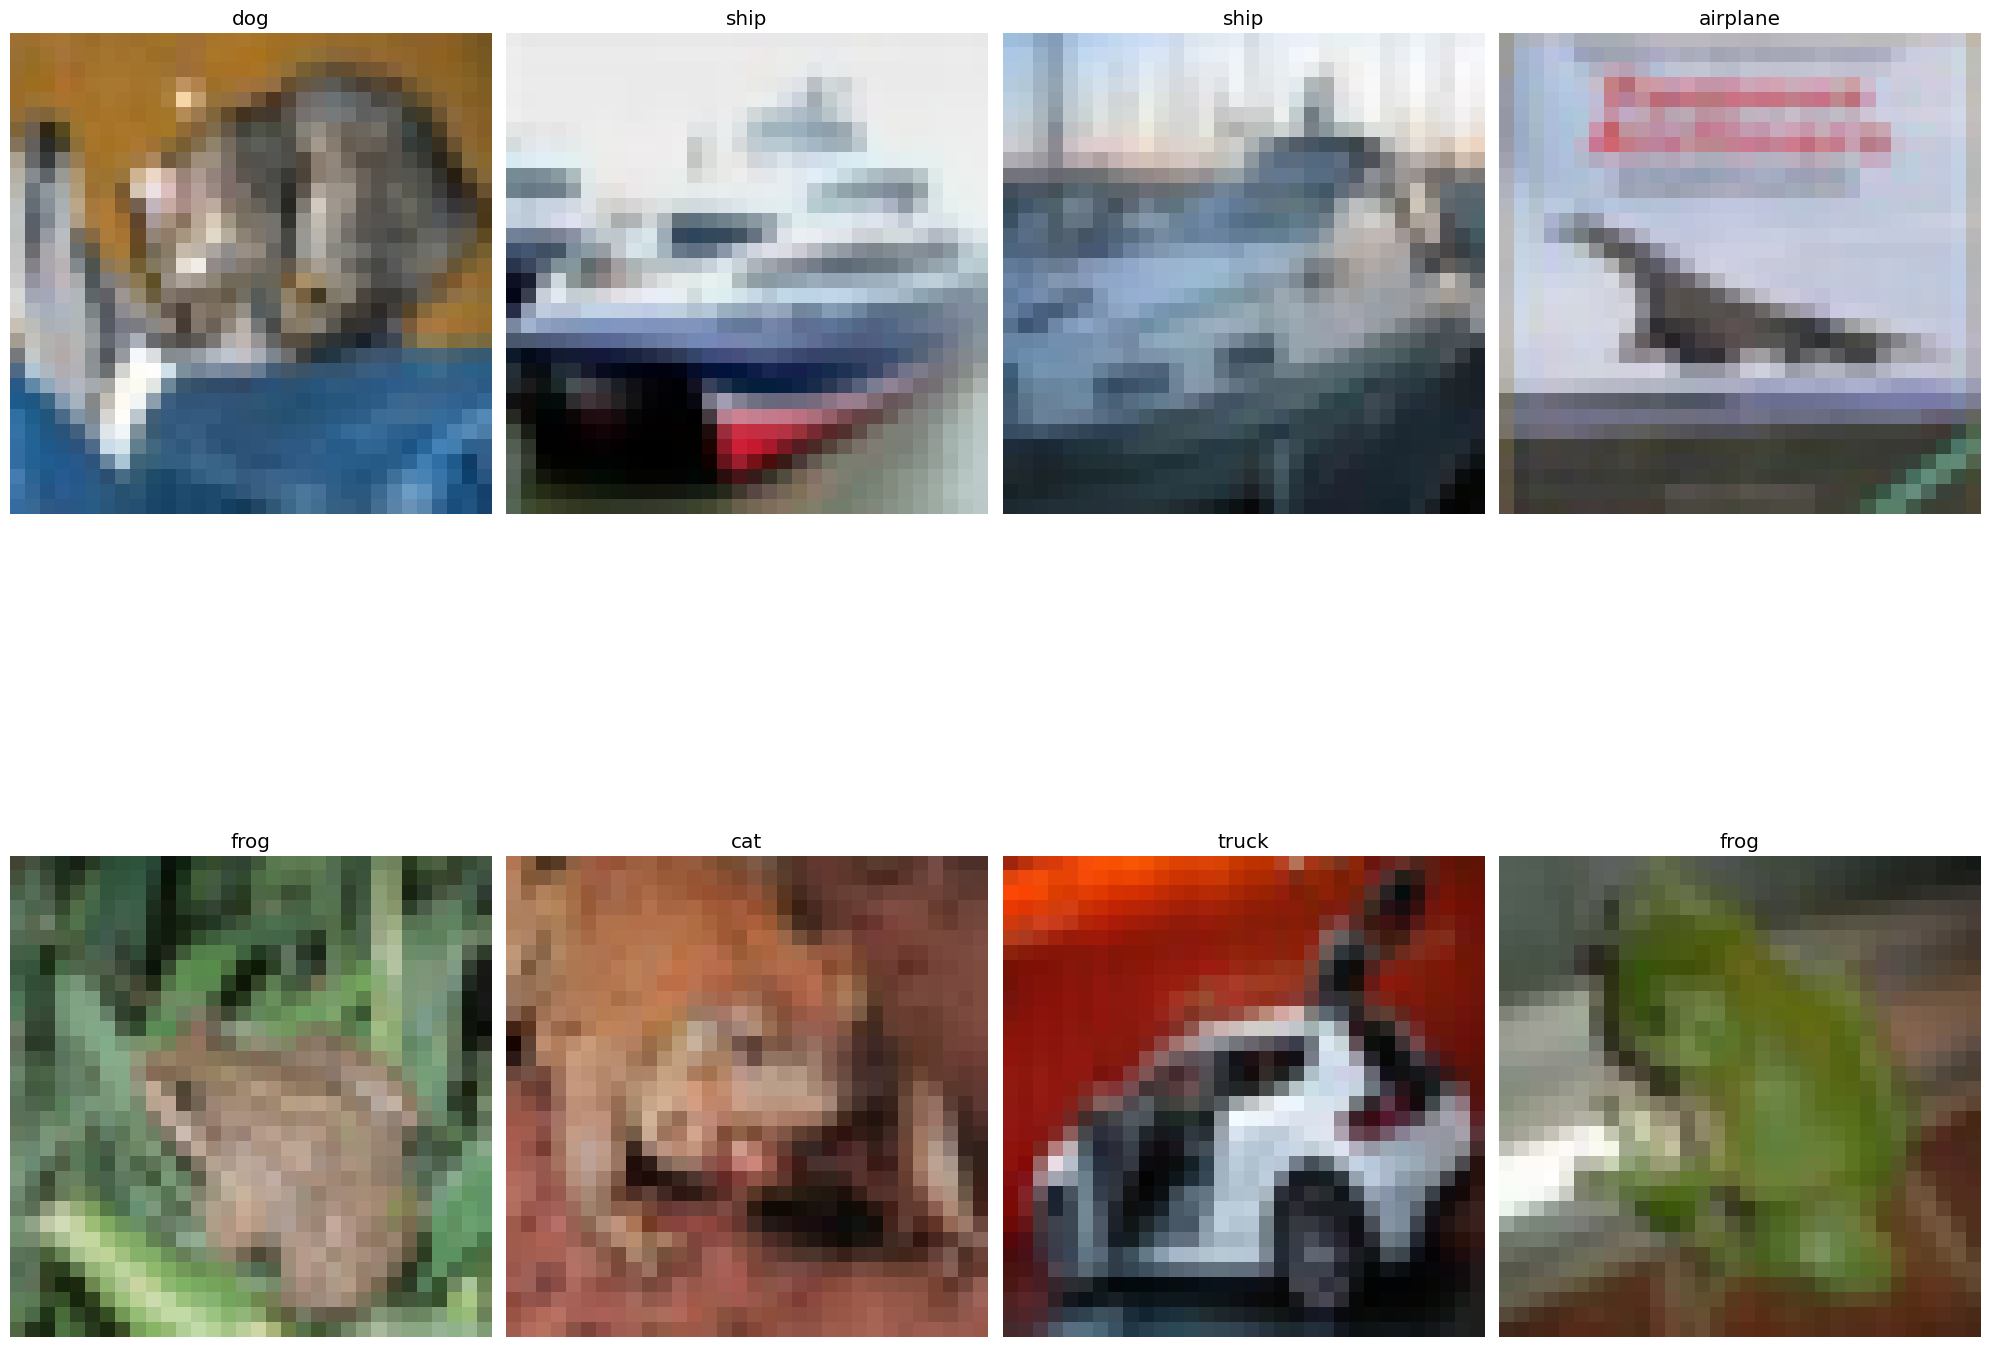

In [ ]:
plotImages(x_test[:8], y_preds[:8])

## Advanced CNN Architectures:
Here's a list of essential **Convolutional Neural Network (CNN) architectures** that are widely used in deep learning, especially for image classification:

### Essential CNN Architectures to Know

1. **LeNet-5 (1998)**
   - One of the earliest CNN architectures, used primarily for digit recognition.
2. **AlexNet (2012)**
   - Significant in deep learning due to its success in the ImageNet competition.
3. **VGGNet (2014)**
   - Known for using very deep layers (16 or 19 layers) with small 3x3 filters.
4. **GoogLeNet (Inception) (2014)**
   - Introduced the Inception module, which allows for more efficient computing.
5. **ResNet (2015)**
   - Introduced residual connections, solving the vanishing gradient problem in very deep networks.
6. **DenseNet (2017)**
   - Densely connected CNNs where each layer receives input from all previous layers.
7. **Xception (2017)**
   - Extreme Inception, uses depthwise separable convolutions for better efficiency.
8. **MobileNetV1, V2, V3 (2017-2019)**
   - Optimized for mobile and embedded devices.
9. **NASNet (2018)**
   - Neural Architecture Search to automatically search for the best architecture.
10. **EfficientNet (2019)**
    - Uses a compound scaling method to balance network depth, width, and resolution.
11. **Vision Transformers (ViT) (2020)**
    - Although not a CNN, it's important to note as an alternative architecture for image classification.


### CNN Architectures in TensorFlow:
You can load many CNN architectures from `tf.keras.applications`. Here’s a mapping of popular architectures with their loading functions:

| Architecture     | Loading Function in TensorFlow (`tf.keras.applications`)          |
|------------------|------------------------------------------------------------------|
| **LeNet**        | Not included (custom model can be created)                       |
| **AlexNet**      | Not included (custom model can be created)                       |
| **VGG16/VGG19**  | `VGG16`, `VGG19`                                                 |
| **InceptionV3**  | `InceptionV3`                                                    |
| **ResNet50**     | `ResNet50`, `ResNet101`, `ResNet152`                             |
| **DenseNet**     | `DenseNet121`, `DenseNet169`, `DenseNet201`                      |
| **Xception**     | `Xception`                                                       |
| **MobileNetV1/V2/V3** | `MobileNet`, `MobileNetV2`, `MobileNetV3Small`, `MobileNetV3Large` |
| **NASNet**       | `NASNetMobile`, `NASNetLarge`                                    |
| **EfficientNet** | `EfficientNetB0` to `EfficientNetB7`                             |

### Key Concepts:
- **Preprocessing**: Each model requires its own preprocessing function, which typically normalizes pixel values for the pre-trained weights.
- **Predictions**: The prediction output is a list of probabilities for each of the 1000 classes in ImageNet, which is decoded into human-readable labels.